Data Loading and Initial Exploration

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [65]:
# Load the data
df = pd.read_csv('Daily Household Transactions.csv')

In [66]:
# Initial exploration
print("Data shape:", df.shape)

Data shape: (2461, 8)


In [67]:
df.head(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [69]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


Data Cleaning and Preprocessing

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract year, month, and day for analysis
df['Year'] = df['Date'].dt.year

In [ ]:
df['Year'].head(5)

0    2018.0
1    2018.0
2       NaN
3    2018.0
4    2018.0
Name: Year, dtype: float64

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df['Month'].head(5)

0    9.0
1    9.0
2    NaN
3    9.0
4    9.0
Name: Month, dtype: float64

In [ ]:
df['Day'] = df['Date'].dt.day

In [ ]:
df['Day'].head(2)

0    20.0
1    20.0
Name: Day, dtype: float64

In [ ]:
# Handle missing values if any
df.fillna({'Note': 'No Note', 'Subcategory': 'Unspecified'}, inplace=True)

In [ ]:
# Convert Amount to numeric (handling any potential issues)
df['Amount'] = pd.to_numeric(df['Amount'])

In [ ]:
df['Amount'].head(2)

0    30.0
1    60.0
Name: Amount, dtype: float64

In [ ]:
# Separate income and expenses
income_df = df[df['Income/Expense'] == 'Income']
expense_df = df[df['Income/Expense'] == 'Expense']
transfer_df = df[df['Income/Expense'].str.contains('Transfer')]

In [ ]:
income_df.head(2)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Month,Day,Year
14,NaT,Saving Bank account 1,Other,Unspecified,From Family,3500.0,Income,INR,NaN,NaN,NaN
33,2018-08-31 09:27:28,Saving Bank account 1,Salary,Unspecified,From workplace,70255.0,Income,INR,8.0,31.0,2018.0


In [ ]:
expense_df.head(2)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Month,Day,Year
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,9.0,20.0,2018.0
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,9.0,20.0,2018.0


In [ ]:
transfer_df.head(2)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Month,Day,Year
10,NaT,Saving Bank account 1,Small Cap fund 2,Unspecified,No Note,5000.0,Transfer-Out,INR,NaN,NaN,NaN
11,NaT,Saving Bank account 1,Small cap fund 1,Unspecified,No Note,5000.0,Transfer-Out,INR,NaN,NaN,NaN


 Exploratory Data Analysis

In [ ]:
# Total income vs expenses
total_income = income_df['Amount'].sum()

In [ ]:
total_income

3042397.3499999996

In [ ]:
total_expense = expense_df['Amount'].sum()

In [ ]:
total_expense

1957390.53

In [ ]:
net_savings = total_income - total_expense

In [ ]:
net_savings

1085006.8199999996

<Figure size 1200x600 with 0 Axes>

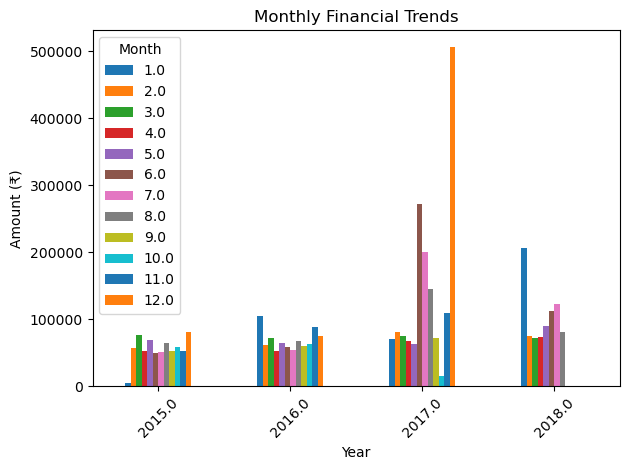

In [ ]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
df.groupby(['Year', 'Month'])['Amount'].sum().unstack().plot(kind='bar', stacked=False)
plt.title('Monthly Financial Trends')
plt.ylabel('Amount (₹)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Expense Analysis


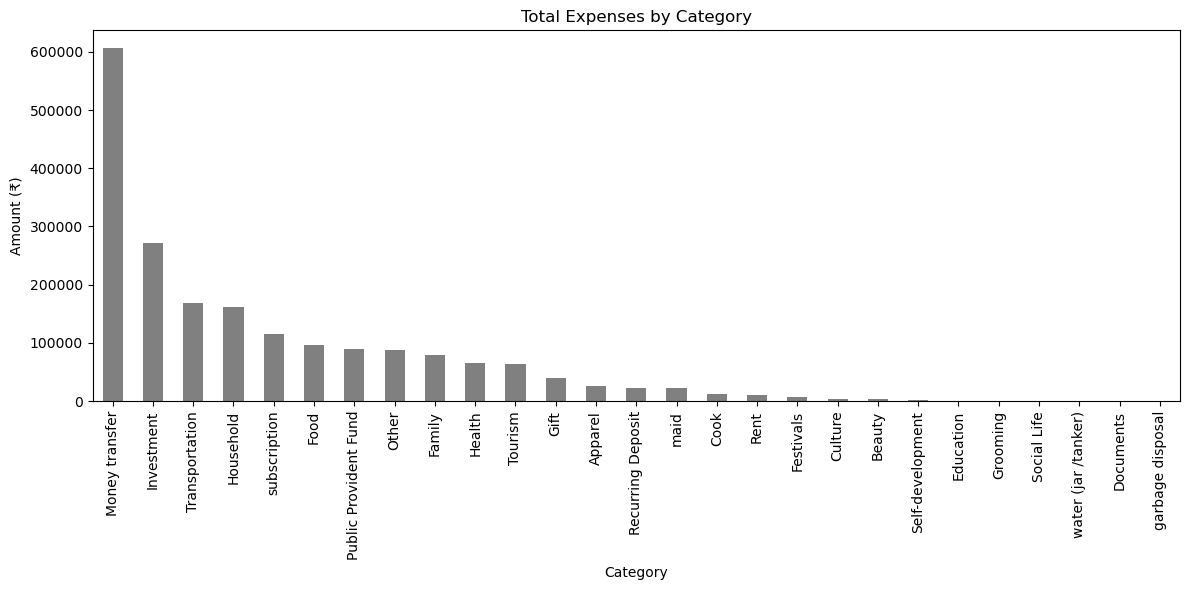

In [ ]:
# Top expense categories
plt.figure(figsize=(12, 6))
expense_df.groupby('Category')['Amount'].sum().sort_values(ascending=False).plot(kind='bar',color='grey')
plt.title('Total Expenses by Category')
plt.ylabel('Amount (₹)')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
expense_df.head(2)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR


Income Analysis

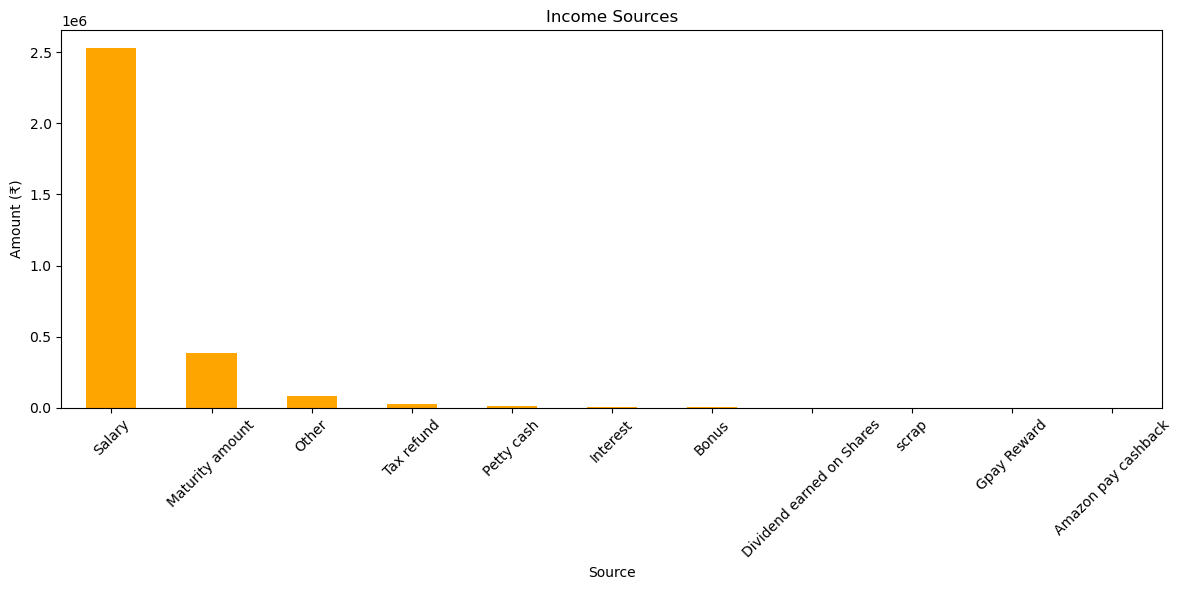

In [ ]:
# Income sources
plt.figure(figsize=(12, 6))
income_df.groupby('Category')['Amount'].sum().sort_values(ascending=False).plot(kind='bar',color='orange')
plt.title('Income Sources')
plt.ylabel('Amount (₹)')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Payment Mode Analysis

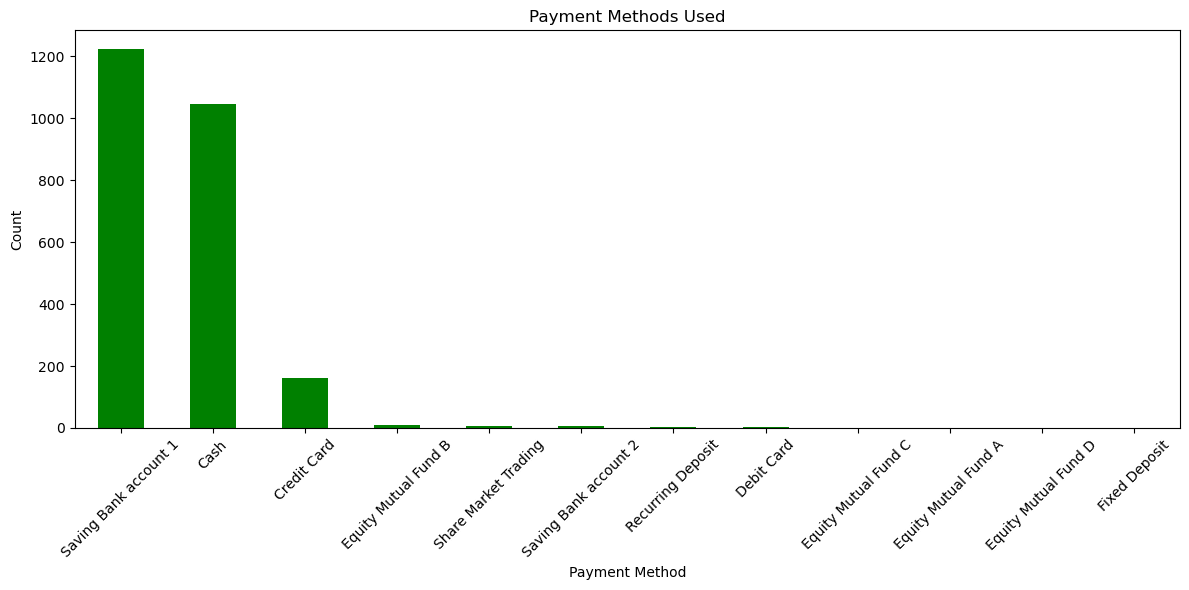

In [ ]:
# Payment modes used
plt.figure(figsize=(12, 6))
df['Mode'].value_counts().plot(kind='bar',color = 'green')
plt.title('Payment Methods Used')
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

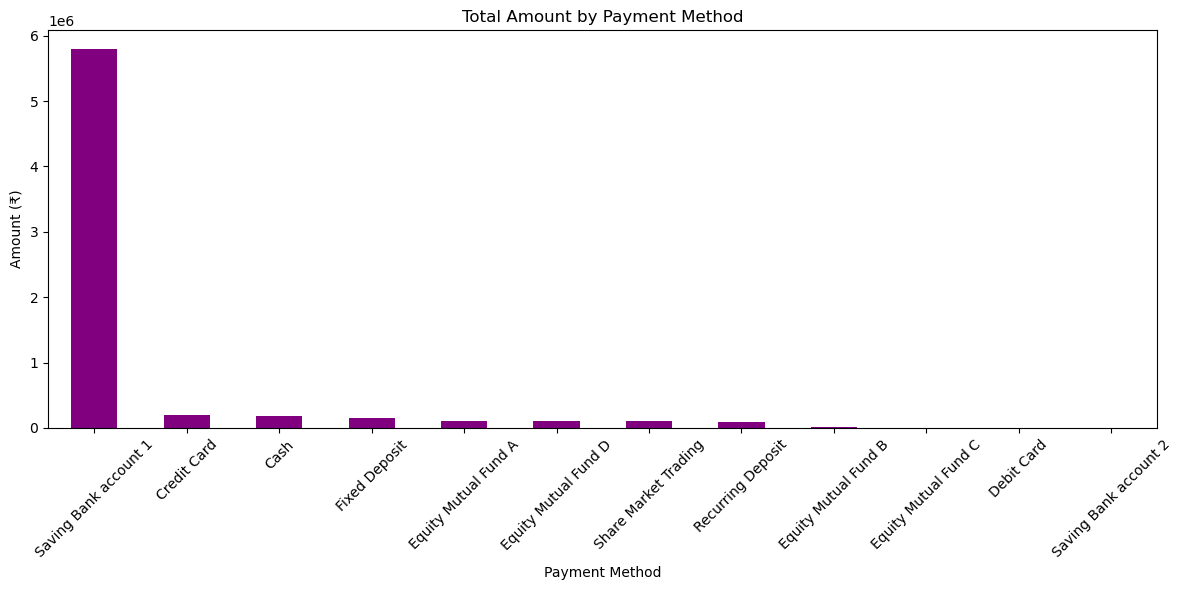

In [ ]:
# Amount spent by payment mode
plt.figure(figsize=(12, 6))
df.groupby('Mode')['Amount'].sum().sort_values(ascending=False).plot(kind='bar',color='purple')
plt.title('Total Amount by Payment Method')
plt.ylabel('Amount (₹)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Advanced Analysis

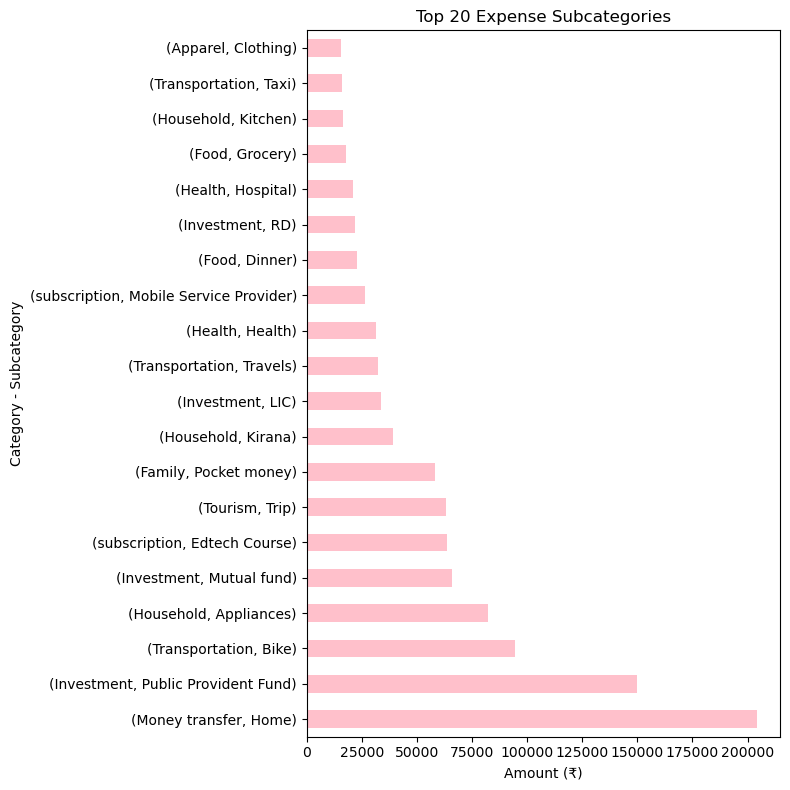

In [ ]:
# Top expense subcategories
top_subcategories = expense_df.groupby(['Category', 'Subcategory'])['Amount'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 8))
top_subcategories.plot(kind='barh', color='pink')
plt.title('Top 20 Expense Subcategories')
plt.xlabel('Amount (₹)')
plt.ylabel('Category - Subcategory')
plt.tight_layout()
plt.show()

Time Series Analysis

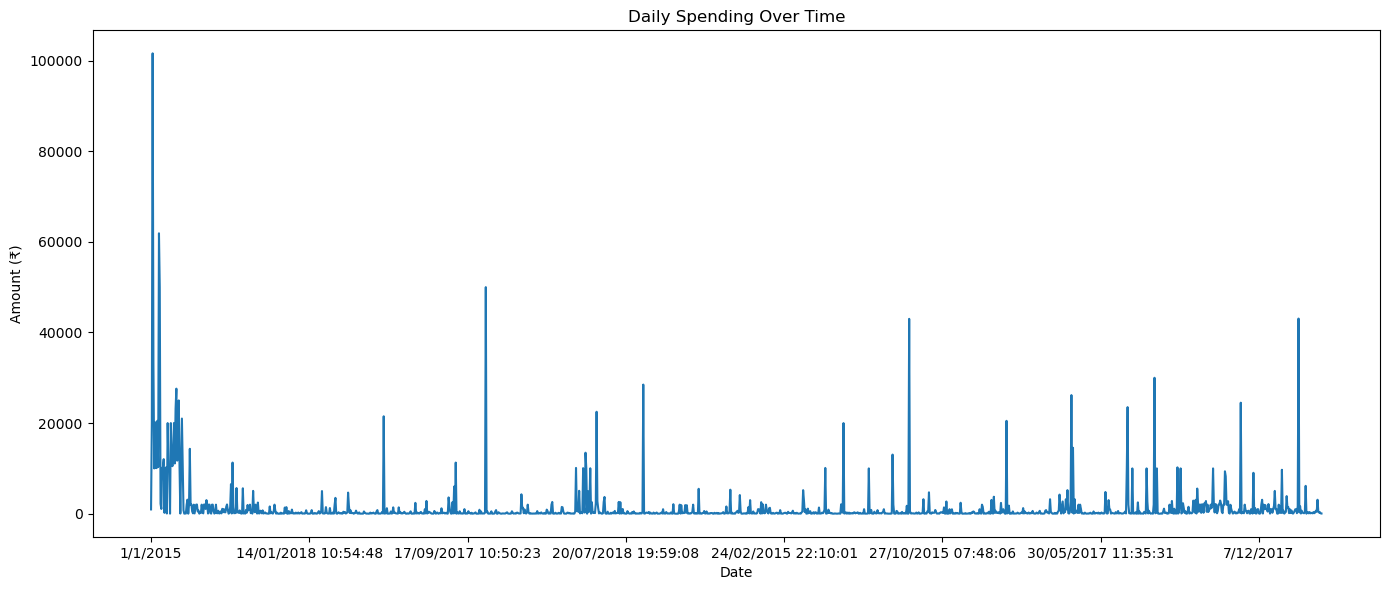

In [ ]:
# Daily spending trends
daily_spending = expense_df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(14, 6))
daily_spending.plot()
plt.title('Daily Spending Over Time')
plt.ylabel('Amount (₹)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

Transaction Notes Analysis

In [76]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 109.0 kB/s eta 0:00:0000:0100:01


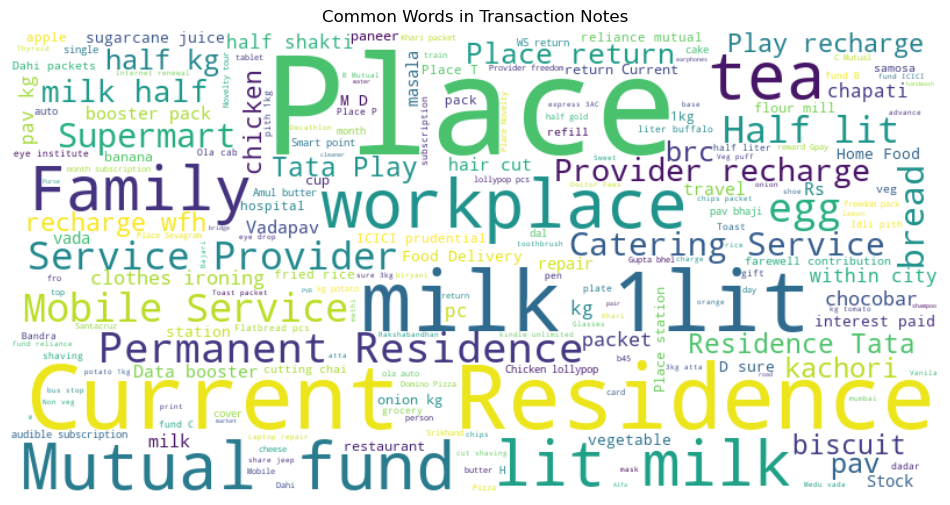

In [77]:
# Common words in transaction notes
from wordcloud import WordCloud

notes_text = ' '.join(df['Note'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(notes_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Transaction Notes')
plt.show()